In [1]:
import os
from pyspark.context import SparkContext
from pyspark.sql.session import SparkSession
sc = SparkContext('local')
spark = SparkSession(sc)

In [5]:
myDf = spark\
        .read.format('com.databricks.spark.csv')\
        .options(header='true', inferschema='true')\
        .load(os.path.join('data','서울특별시_공공자전거 일별 대여건수_(2018_2019.03).csv'))

In [6]:
myDf.printSchema()

root
 |-- 대여일자: string (nullable = true)
 |-- 대여건수: integer (nullable = true)



In [7]:
myDf.show(3)

+----------+--------+
|  대여일자|대여건수|
+----------+--------+
|2018-01-01|    4950|
|2018-01-02|    7136|
|2018-01-03|    7156|
+----------+--------+
only showing top 3 rows




## 문제 1-1: 년도별 대여건수 합계
데이터는 2018, 2019년 15개월 간의 대여건수이다. 년도별로 대여건수의 합계를 계산해서 출력하자.

In [21]:
myDf=myDf.withColumn("year",myDf.대여일자.substr(1,4))#substr(1,4)로 연도만 짜름

In [22]:
myDf.show(5)

+----------+--------+----+
|  대여일자|대여건수|year|
+----------+--------+----+
|2018-01-01|    4950|2018|
|2018-01-02|    7136|2018|
|2018-01-03|    7156|2018|
|2018-01-04|    7102|2018|
|2018-01-05|    7705|2018|
+----------+--------+----+
only showing top 5 rows



In [25]:
myDf.groupBy('year').agg({"대여건수":"sum"}).orderBy("year").show()

+----+-------------+
|year|sum(대여건수)|
+----+-------------+
|2018|     10124874|
|2019|      1871935|
+----+-------------+



## 문제 1-2: 년도별, 월별 대여건수 합계
년별, 월별로 대여건수를 계산하여 합계를 계산하여 출력한다.

In [29]:
myDf2=myDf.withColumn("year_month",myDf.대여일자.substr(1,7))#월까지

In [30]:
myDf2.show(3)

+----------+--------+----+----------+
|  대여일자|대여건수|year|year_month|
+----------+--------+----+----------+
|2018-01-01|    4950|2018|   2018-01|
|2018-01-02|    7136|2018|   2018-01|
|2018-01-03|    7156|2018|   2018-01|
+----------+--------+----+----------+
only showing top 3 rows



In [32]:
sumbook=myDf2.groupBy('year_month').agg({"대여건수":"sum"}).orderBy("year_month")

In [33]:
sumbook.show()

+----------+-------------+
|year_month|sum(대여건수)|
+----------+-------------+
|   2018-01|       164367|
|   2018-02|       168741|
|   2018-03|       462661|
|   2018-04|       687885|
|   2018-05|       965609|
|   2018-06|      1207123|
|   2018-07|      1100015|
|   2018-08|      1037505|
|   2018-09|      1447993|
|   2018-10|      1420621|
|   2018-11|       961532|
|   2018-12|       500822|
|   2019-01|       495573|
|   2019-02|       471543|
|   2019-03|       904819|
+----------+-------------+



## 문제 1-3: 년도별, 월별 대여건수 그래프¶
문제 1-2의 출력을 선 그래프로 그려보자.

In [34]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [35]:
y_m=sumbook.rdd.map(lambda fields:fields[0]).collect()
sum_rental=sumbook.rdd.map(lambda fields:fields[1]).collect()

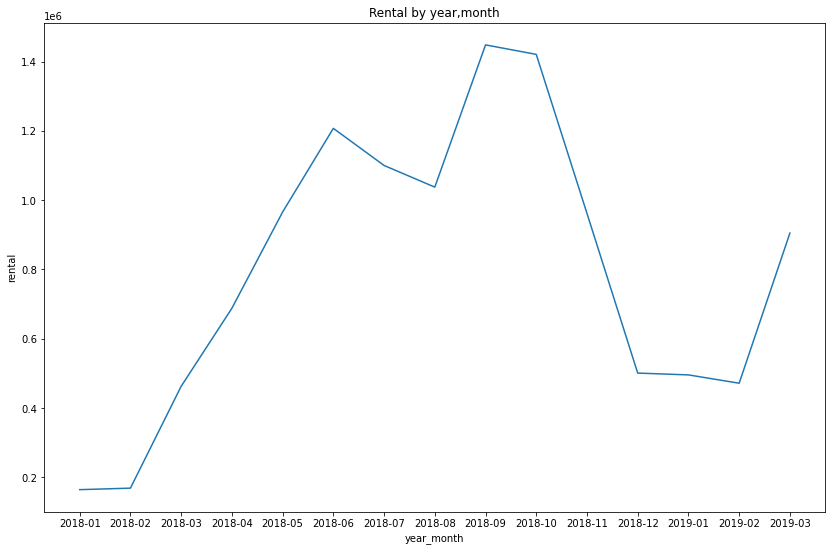

In [46]:
plt.plot(np.array(y_m), np.array(sum_rental))
plt.rcParams["figure.figsize"] = (14,9)
plt.title("Rental by year,month")

#x,y label
plt.xlabel("year_month")
plt.ylabel("rental")
plt.show()